In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the audio file
y, sr = librosa.load('Code_I.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

y: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.0529909e-07
 -2.2378131e-07  7.6451073e-08] 

y shape: (13824,) 

Sample Rate (KHz): 22050 



In [3]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 2.9540548e-05  3.0140622e-05  1.6401194e-05 ...  4.0529909e-07
 -2.2378131e-07  7.6451073e-08] 

Audio File shape: (13312,)


Fourier Transform of the audio file

In [4]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

Spectrogram

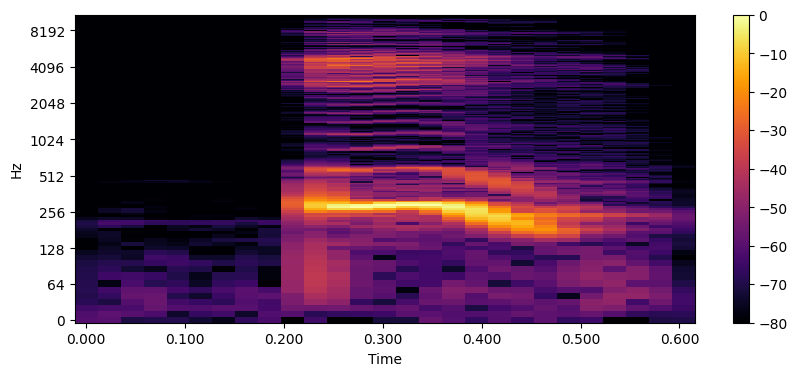

In [5]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (10, 4))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'inferno')
plt.colorbar();

Mel Spectrogram

/tmp/ipykernel_4988/3883608762.py:4: FutureWarning: Pass y=[ 2.9540548e-05  3.0140622e-05  1.6401194e-05 ...  4.0529909e-07
 -2.2378131e-07  7.6451073e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)


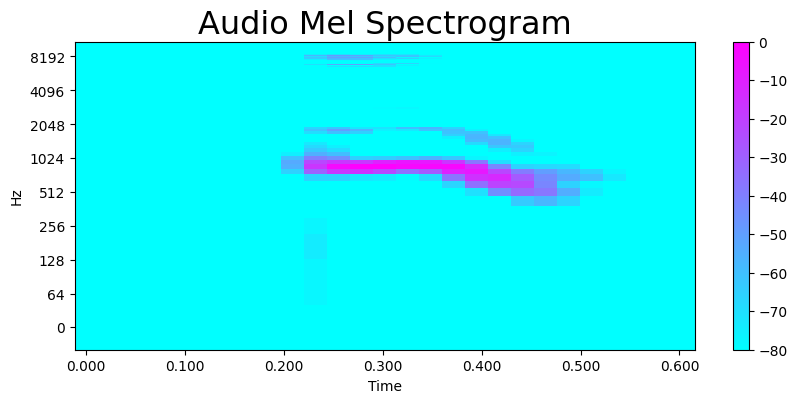

In [6]:
y, sr = librosa.load('Code_I.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (10, 4))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Audio Mel Spectrogram", fontsize = 23);